In [102]:
import mediapy as media
import matplotlib.pyplot as plt
import numpy as np
import hnswlib

In [3]:
test_vid = media.read_video('baselines/session_5ca3d910/rollouts/full_reset_1_idd65cb3b7.mp4')

In [4]:
test_vid.shape

(14337, 144, 160, 3)

In [103]:
down_size = 16

In [104]:
res = cv2.resize(test_vid[0], dsize=(160//down_size, 144//down_size), interpolation=cv2.INTER_AREA)

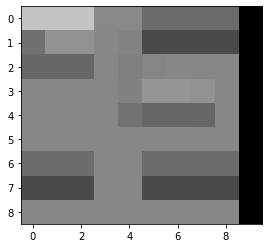

In [105]:
plt.imshow(res)

In [106]:
img_a = cv2.resize(test_vid[0], dsize=(160//down_size, 144//down_size), interpolation=cv2.INTER_AREA)
img_b = cv2.resize(test_vid[5], dsize=(160//down_size, 144//down_size), interpolation=cv2.INTER_AREA)

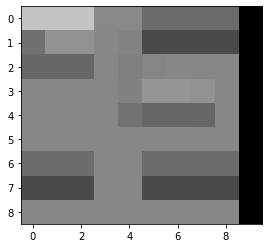

In [107]:
plt.imshow(img_a)

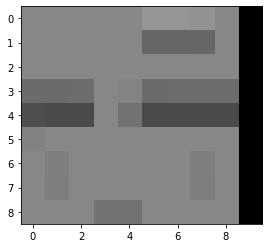

In [101]:
plt.imshow(img_b)

In [94]:
orb = cv2.ORB_create(nfeatures=250)

# Find the key points and descriptors with ORB
keypoints1, descriptors1 = orb.detectAndCompute(img_a, None)
keypoints2, descriptors2 = orb.detectAndCompute(img_b, None)

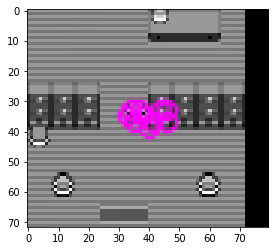

In [95]:
plt.imshow(cv2.drawKeypoints(img_b, keypoints2, None, (255, 0, 255)))

In [29]:
bf = cv2.BFMatcher_create(cv2.NORM_HAMMING)

# Find matching points
matches = bf.knnMatch(descriptors1, descriptors2,k=2)

In [30]:
def draw_matches(img1, keypoints1, img2, keypoints2, matches):
    r, c = img1.shape[:2]
    r1, c1 = img2.shape[:2]

    # Create a blank image with the size of the first image + second image
    output_img = np.zeros((max([r, r1]), c+c1, 3), dtype='uint8')
    output_img[:r, :c, :] = np.dstack([img1, img1, img1])
    output_img[:r1, c:c+c1, :] = np.dstack([img2, img2, img2])

    # Go over all of the matching points and extract them
    for match in matches:
        img1_idx = match.queryIdx
        img2_idx = match.trainIdx
        (x1, y1) = keypoints1[img1_idx].pt
        (x2, y2) = keypoints2[img2_idx].pt

        # Draw circles on the keypoints
        cv2.circle(output_img, (int(x1),int(y1)), 4, (0, 255, 255), 1)
        cv2.circle(output_img, (int(x2)+c,int(y2)), 4, (0, 255, 255), 1)

        # Connect the same keypoints
        cv2.line(output_img, (int(x1),int(y1)), (int(x2)+c,int(y2)), (0, 255, 255), 1)
    
    return output_img

In [31]:
all_matches = []
for m, n in matches:
    all_matches.append(m)

img3 = draw_matches(img_a.mean(2), keypoints1, img_b.mean(2), keypoints2, all_matches[:30])

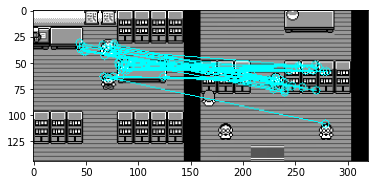

In [32]:
plt.imshow(img3)

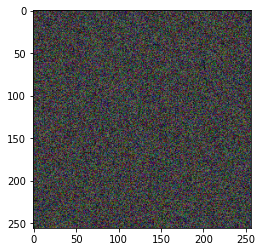

In [37]:
import matplotlib.pyplot as plt
import numpy as np
plt.imshow(0.5*np.random.rand(256,256,3))